# Marital Satisfaction Models


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Load the dataset
df = pd.read_csv('msr3.csv')
df

country  gender   age  yr_mrr  chd  chda  edu  physio   raf  rel  ...  \
0     Brazil       1  21.0     2.0    0     0    5       3   1.0    4  ...   
1     Brazil       1  29.0     3.0    1     0    5       3   1.0    2  ...   
2     Brazil       1  30.0     7.0    0     0    5       3   1.0    4  ...   
3     Brazil       1  30.0     7.0    1     1    5       3   1.0    2  ...   
4     Brazil       1  28.0     9.0    0     0    4       2   1.0    3  ...   
...      ...     ...   ...     ...  ...   ...  ...     ...   ...  ...  ...   
7173  Uganda       1  32.0     7.0    2     3    5       1  10.0    4  ...   
7174  Uganda       1  36.0     6.0    4     4    5       3   NaN    4  ...   
7175  Uganda       1  32.0     2.0    1     1    5       2   NaN    1  ...   
7176  Uganda       1  27.0     3.0    2     2    5       2   NaN    1  ...   
7177  Uganda       1  53.0    24.0    6     1    5       3   NaN    2  ...   

      ms2  ms3  scoll1  scoll2  scoll3  scoll4  icoll1  icoll2  icoll3  icoll4  
0       1    1       1       1       1       1       1       1       1       1  
1       2    2       2       1       1       1       1       1       1       1  
2       1    1       2       1       2       1       1       1       1       1  
3       2    2       3       1       1       2       1       1       1       1  
4       2    1       3       2       3       2       1       1       1       1  
...   ...  ...     ...     ...     ...     ...     ...     ...     ...     ...  
7173    3    3       2       2       2       7       2       2       2       7  
7174    2    2       2       2       2       3       3       2       1       1  
7175    1    1       1       1       4       2       1       2       4       2  
7176    1    2       1       2       3       4       3       3       2       3  
7177    3    3       1       1       2       3       1       1       2       5  

[7178 rows x 31 columns]

In [ ]:
# Check the data types of each column
df.dtypes

country     object
gender       int64
age        float64
yr_mrr     float64
chd          int64
chda         int64
edu          int64
physio       int64
raf        float64
rel          int64
safety       int64
love4        int64
happy        int64
esteem2      int64
love5        int64
love3        int64
esteem1      int64
sact         int64
love2        int64
love1        int64
ms1          int64
ms2          int64
ms3          int64
scoll1       int64
scoll2       int64
scoll3       int64
scoll4       int64
icoll1       int64
icoll2       int64
icoll3       int64
icoll4       int64
dtype: object

In [ ]:
# Check the missing values in each column
df.isnull().sum()

country     0
gender      0
age         0
yr_mrr      0
chd         0
chda        0
edu         0
physio      0
raf        86
rel         0
safety      0
love4       0
happy       0
esteem2     0
love5       0
love3       0
esteem1     0
sact        0
love2       0
love1       0
ms1         0
ms2         0
ms3         0
scoll1      0
scoll2      0
scoll3      0
scoll4      0
icoll1      0
icoll2      0
icoll3      0
icoll4      0
dtype: int64

Distribution of Marital Satisfaction

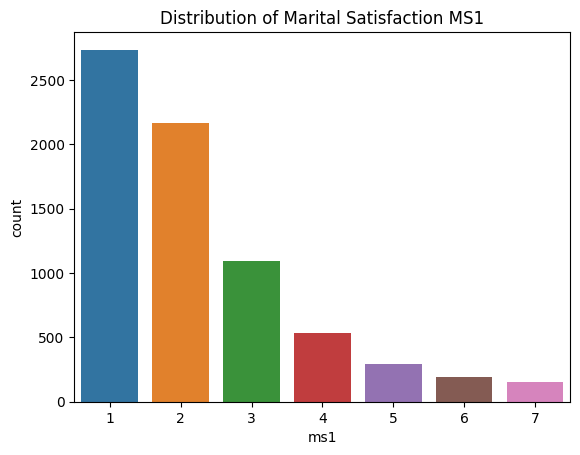

In [ ]:
sns.countplot(x='ms1', data=df)
plt.title('Distribution of Marital Satisfaction MS1')
plt.show()

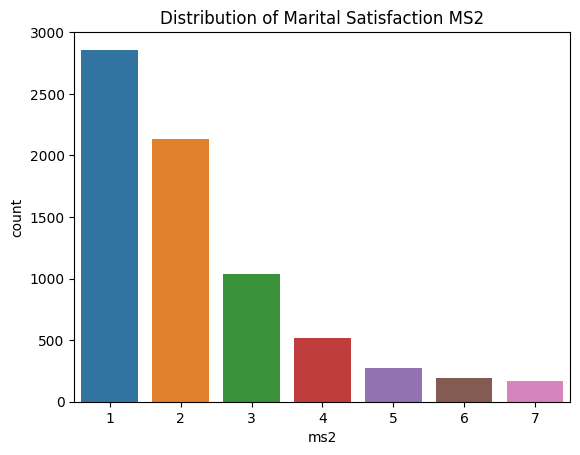

In [ ]:
sns.countplot(x='ms2', data=df)
plt.title('Distribution of Marital Satisfaction MS2')
plt.show()

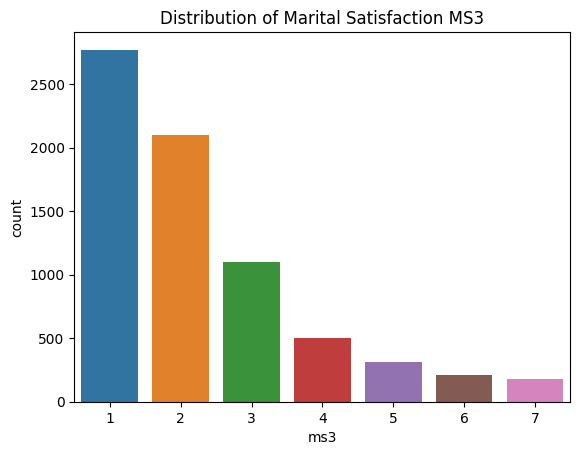

In [ ]:
sns.countplot(x='ms3', data=df)
plt.title('Distribution of Marital Satisfaction MS3')
plt.show()

Correlation Matrix

In [ ]:
cor=df.corr()

<ipython-input-128-48d031cc9737>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


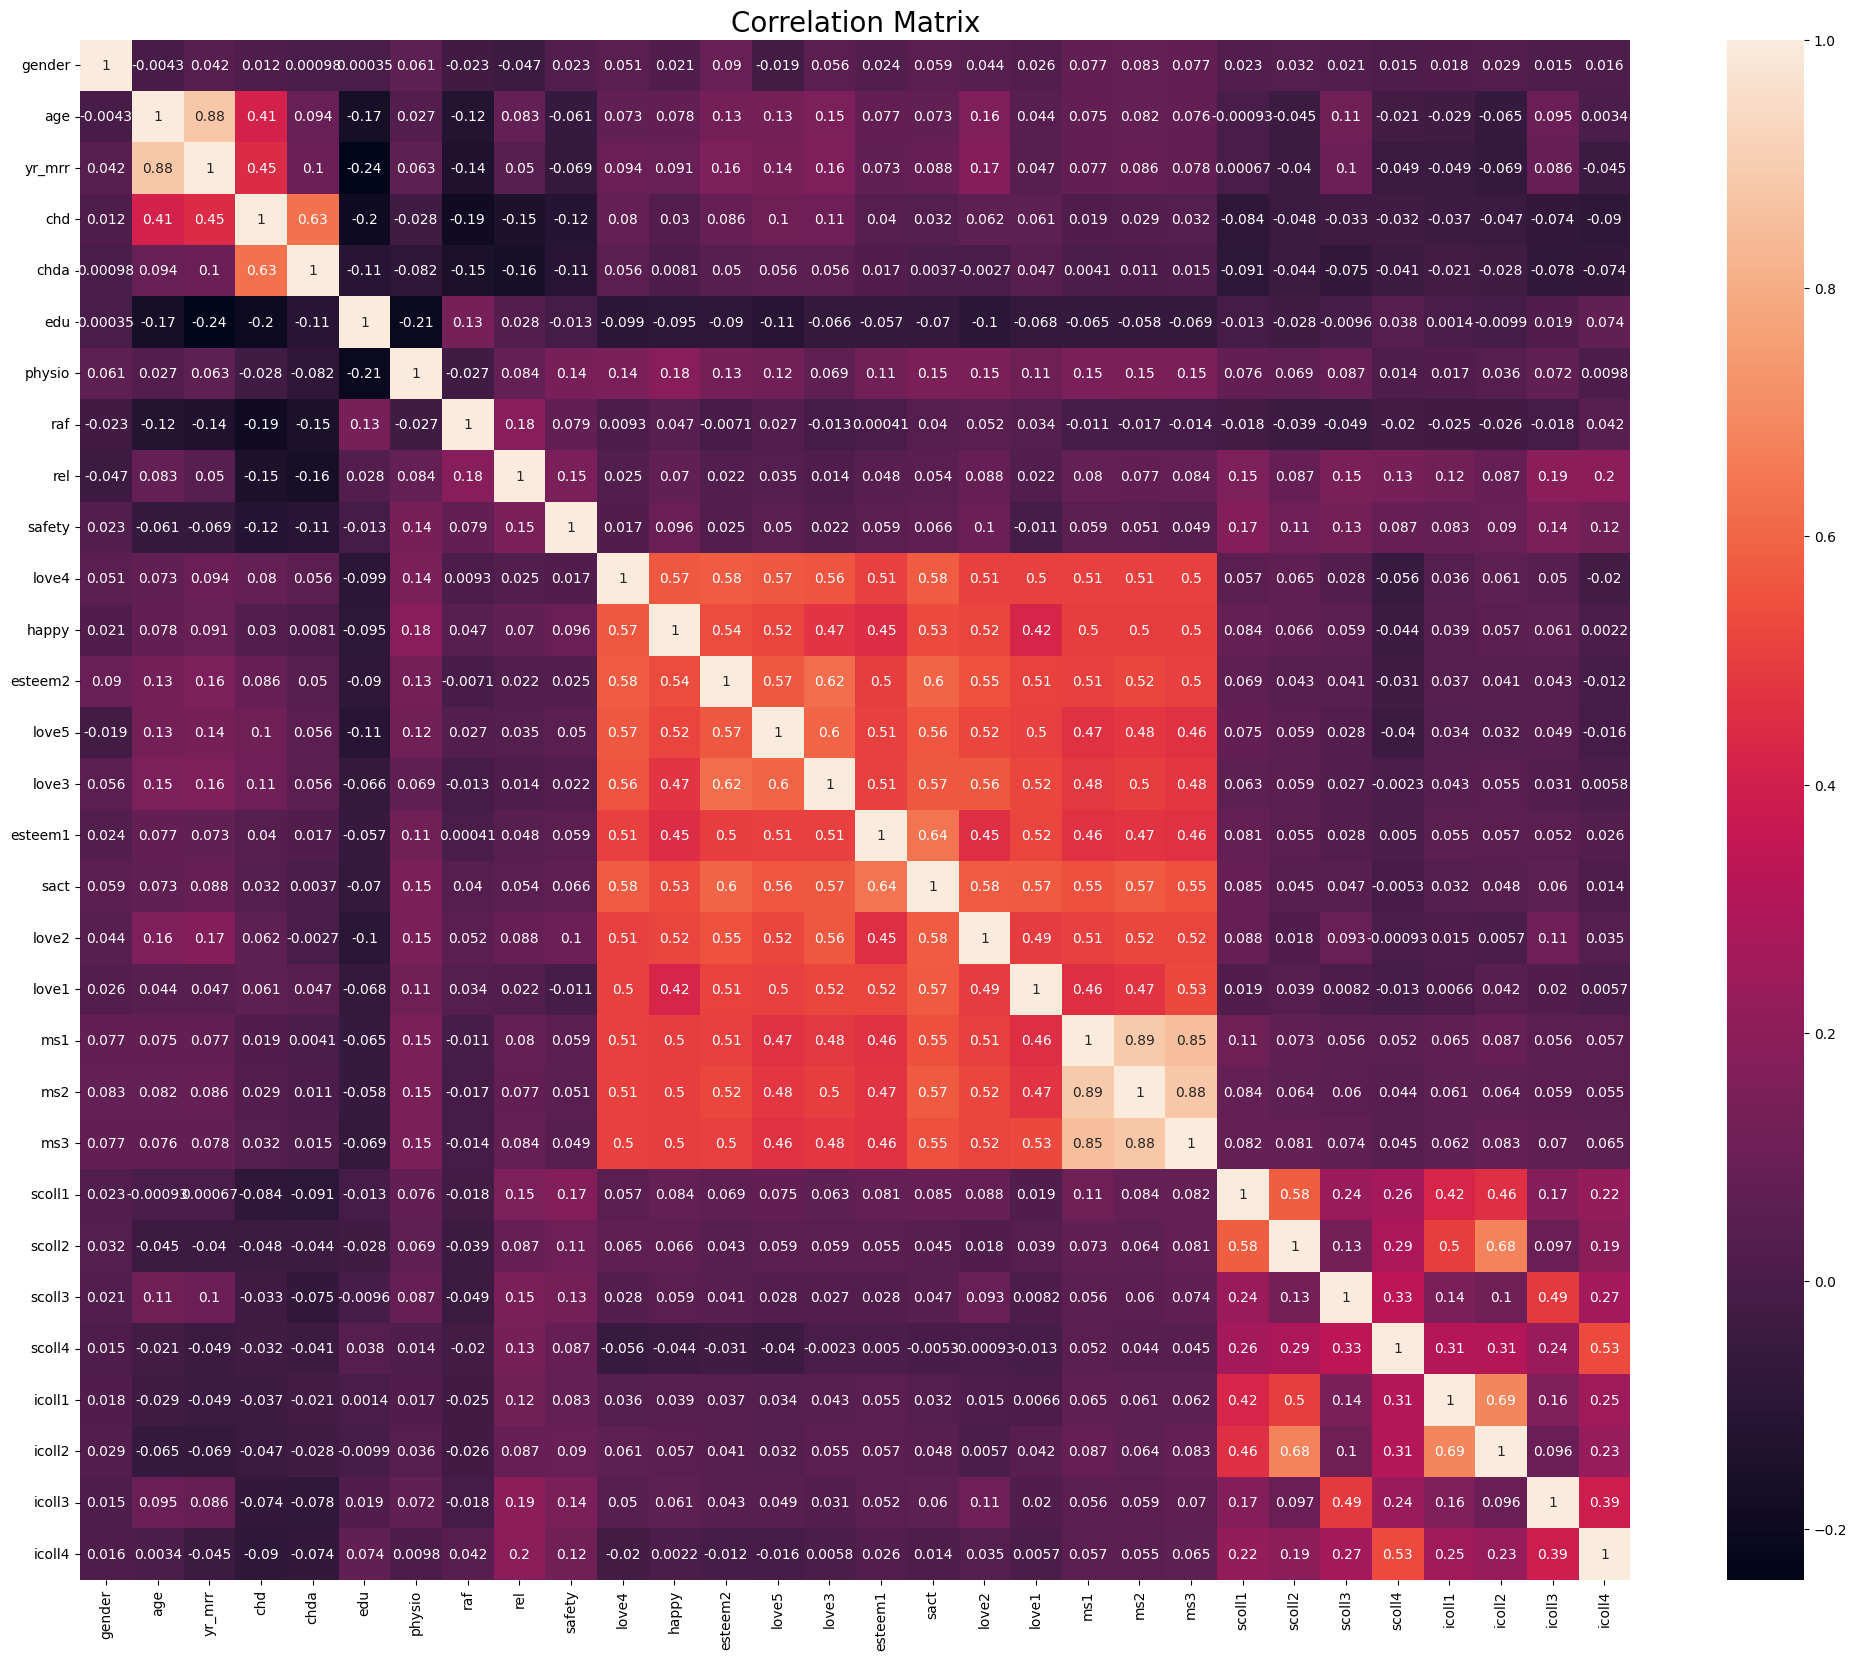

In [ ]:
plt.subplots(figsize=(25,20))
sns.heatmap(cor,annot=True)

plt.title('Correlation Matrix', fontsize=20)
plt.show()

Scatter Plot

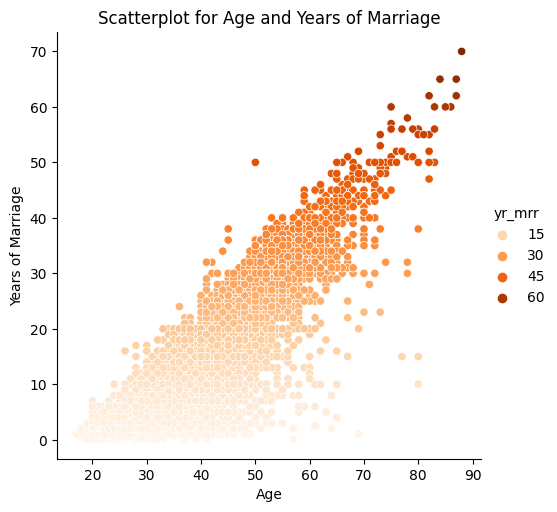

In [ ]:
sns.relplot(x="age", y="yr_mrr", hue="yr_mrr", palette="Oranges", data=df)
plt.xlabel("Age")
plt.ylabel("Years of Marriage")
plt.title("Scatterplot for Age and Years of Marriage")
plt.show()

Distribution of Age

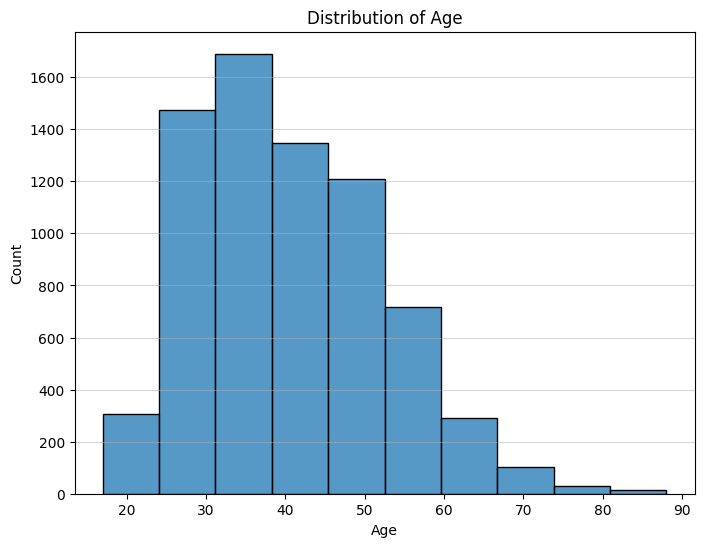

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=10)

plt.grid(axis='y', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Distribution of Gender

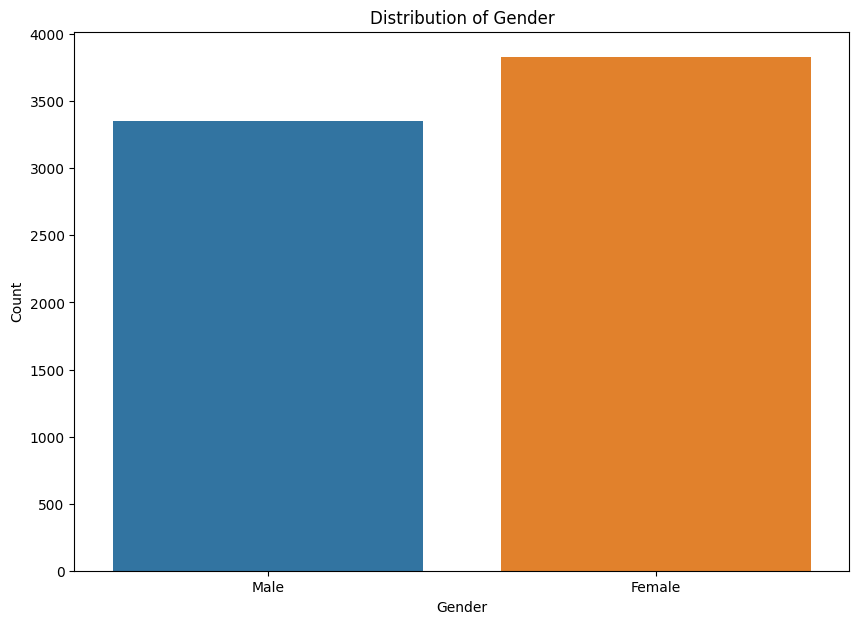

In [ ]:
gender_mapping = {1: 'Male', 2: 'Female'}
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x=df['gender'].map(gender_mapping))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

Distribution of Countries

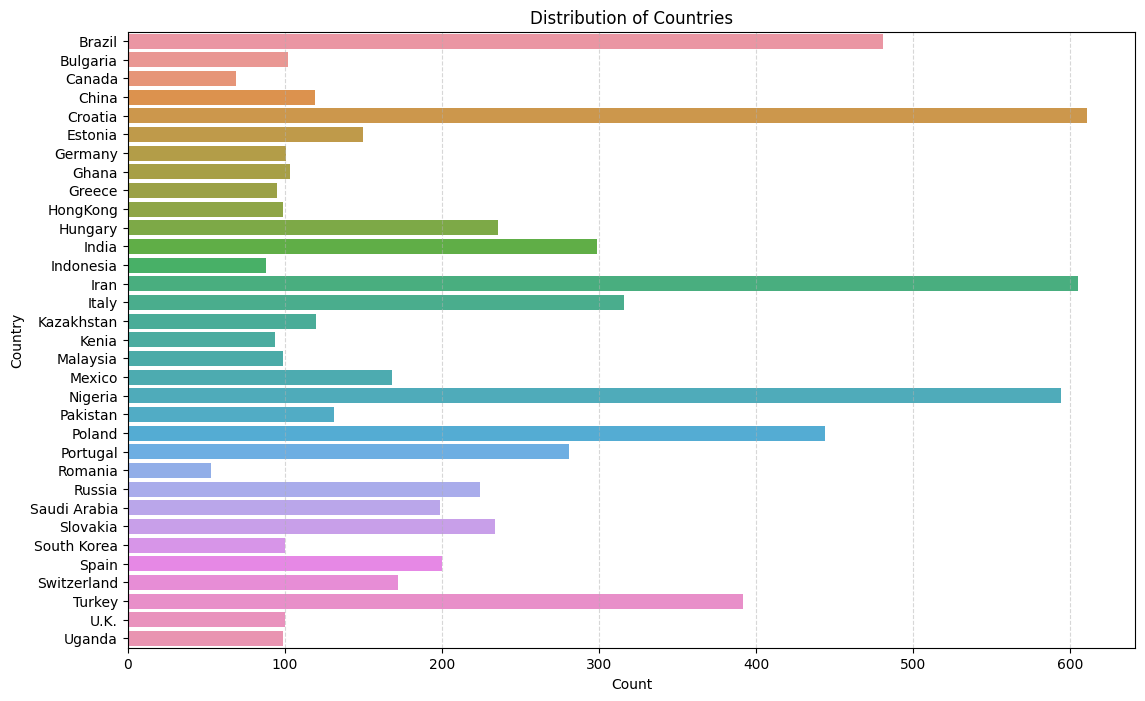

In [ ]:
plt.figure(figsize=(13, 8))
sns.countplot(data=df, y='country')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Distribution of Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

One-Hot Encoding

In [ ]:
encoded = pd.get_dummies(df, columns=['country', 'raf'])
print(encoded.head())

   gender   age  yr_mrr  chd  chda  edu  physio  rel  safety  love4  ...  \
0       1  21.0     2.0    0     0    5       3    4       4      1  ...   
1       1  29.0     3.0    1     0    5       3    2       5      1  ...   
2       1  30.0     7.0    0     0    5       3    4       4      1  ...   
3       1  30.0     7.0    1     1    5       3    2       7      1  ...   
4       1  28.0     9.0    0     0    4       2    3       7      1  ...   

   raf_3.0  raf_4.0  raf_5.0  raf_6.0  raf_7.0  raf_8.0  raf_9.0  raf_10.0  \
0        0        0        0        0        0        0        0         0   
1        0        0        0        0        0        0        0         0   
2        0        0        0        0        0        0        0         0   
3        0        0        0        0        0        0        0         0   
4        0        0        0        0        0        0        0         0   

   raf_11.0  raf_12.0  
0         0         0  
1         0         0  
2 

Split the dataset into features and target variable

In [ ]:
# Features
X1 = encoded.drop('ms1', axis=1)
X2 = encoded.drop('ms2', axis=1)
X3 = encoded.drop('ms3', axis=1)

# Target variable
y1 = encoded['ms1']
y2 = encoded['ms2']
y3 = encoded['ms3']

Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X1_train_sc = stdsc.fit_transform(X1_train)
X1_test_sc = stdsc.transform(X1_test)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X2_train_sc = stdsc.fit_transform(X2_train)
X2_test_sc = stdsc.transform(X2_test)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X3_train_sc = stdsc.fit_transform(X3_train)
X3_test_sc = stdsc.transform(X3_test)

# K-Nearest Neighbor Classifier


KNN for MS1

In [ ]:
# Create classifier objects
knn = KNeighborsClassifier()

# Train and evaluate the K-nearest neighbors classifier for ms1
knn.fit(X1_train_sc, y1_train)
knn_prediction1 = knn.predict(X1_test_sc)
knn_accuracy1 = accuracy_score(y1_test, knn_prediction1)
knn_precision1 = precision_score(y1_test, knn_prediction1, average='weighted')

print("K-Nearest Neighbor Classifier for MS1:")
print("Accuracy MS1:", knn_accuracy1)
print("Precision MS1:", knn_precision1)

K-Nearest Neighbor Classifier for MS1:
Accuracy MS1: 0.49303621169916434
Precision MS1: 0.46164808915931066


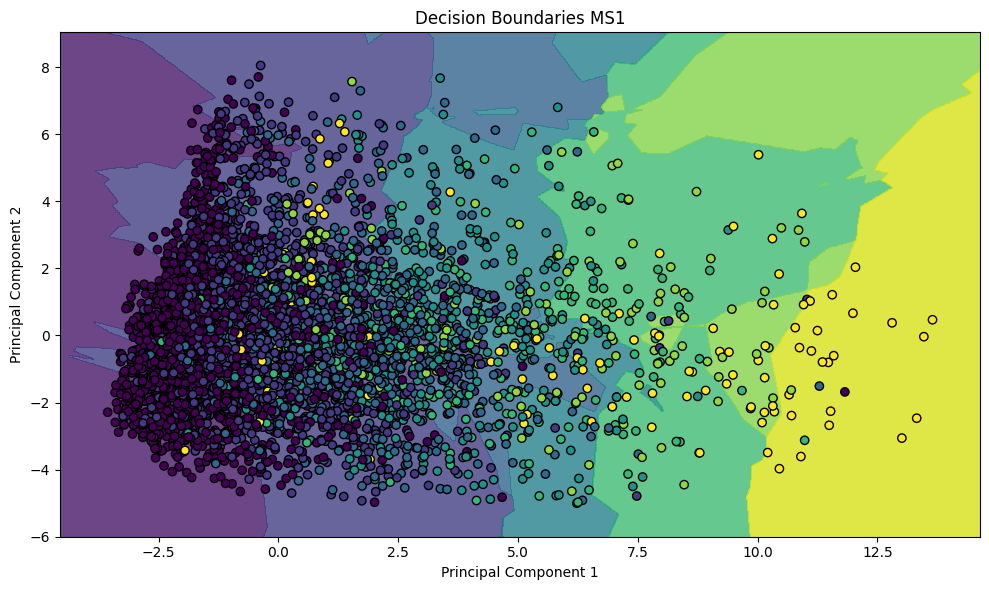

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X1_train_sc)

# Define the meshgrid range
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
step = 0.02

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Predict the class for each point in the meshgrid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y1_train, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries MS1')
plt.tight_layout()
plt.show()

KNN for MS2

In [ ]:
# Create classifier objects
knn = KNeighborsClassifier()

# Train and evaluate the K-nearest neighbors classifier for ms2
knn.fit(X2_train_sc, y2_train)
knn_prediction2 = knn.predict(X2_test_sc)
knn_accuracy2 = accuracy_score(y2_test, knn_prediction2)
knn_precision2 = precision_score(y2_test, knn_prediction2, average='weighted')

print("K-Nearest Neighbor Classifier for MS2:")
print("Accuracy MS2:", knn_accuracy2)
print("Precision MS2:", knn_precision2)

K-Nearest Neighbor Classifier for MS2:
Accuracy MS2: 0.49025069637883006
Precision MS2: 0.45442062386379284


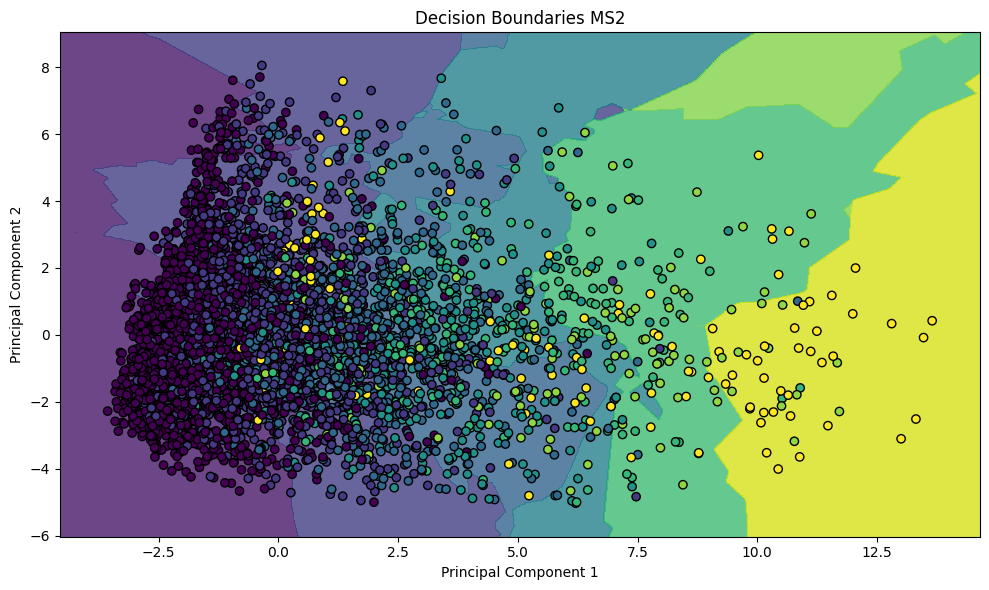

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X2_train_sc)

# Define the meshgrid range
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
step = 0.02

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Predict the class for each point in the meshgrid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y2_train, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries MS2')
plt.tight_layout()
plt.show()


KNN for MS3

In [ ]:
# Create classifier objects
knn = KNeighborsClassifier()

# Train and evaluate the K-nearest neighbors classifier for ms3
knn.fit(X3_train_sc, y3_train)
knn_prediction3 = knn.predict(X3_test_sc)
knn_accuracy3 = accuracy_score(y3_test, knn_prediction3)
knn_precision3 = precision_score(y3_test, knn_prediction3, average='weighted')

print("K-Nearest Neighbor Classifier for MS3:")
print("Accuracy MS3:", knn_accuracy3)
print("Precision MS3:", knn_precision3)

K-Nearest Neighbor Classifier for MS3:
Accuracy MS3: 0.48885793871866295
Precision MS3: 0.455730491987318


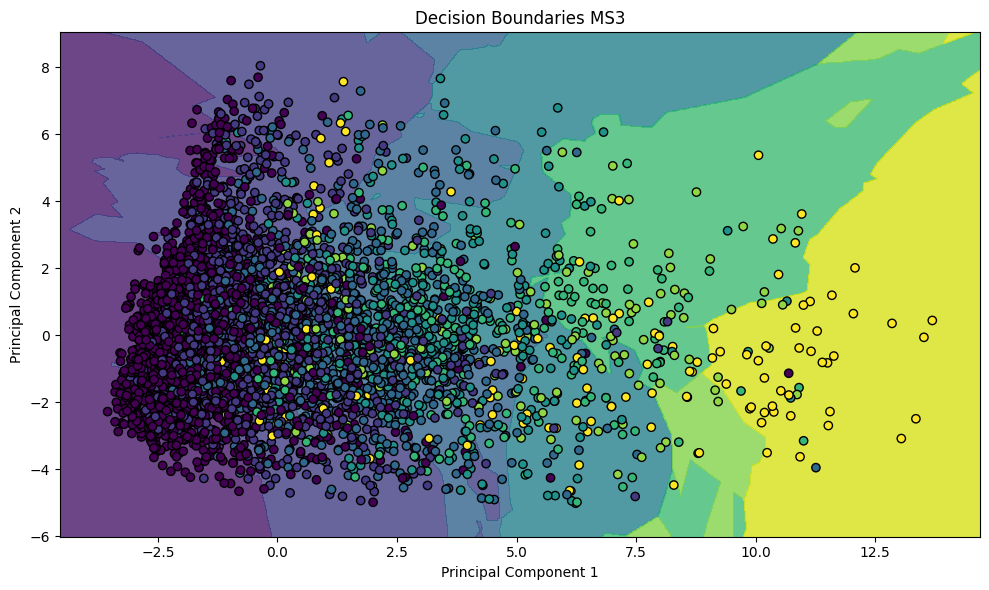

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X3_train_sc)

# Define the meshgrid range
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
step = 0.02

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Predict the class for each point in the meshgrid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y3_train, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries MS3')
plt.tight_layout()
plt.show()

# Decision Tree Classifier


Decision Tree for MS1

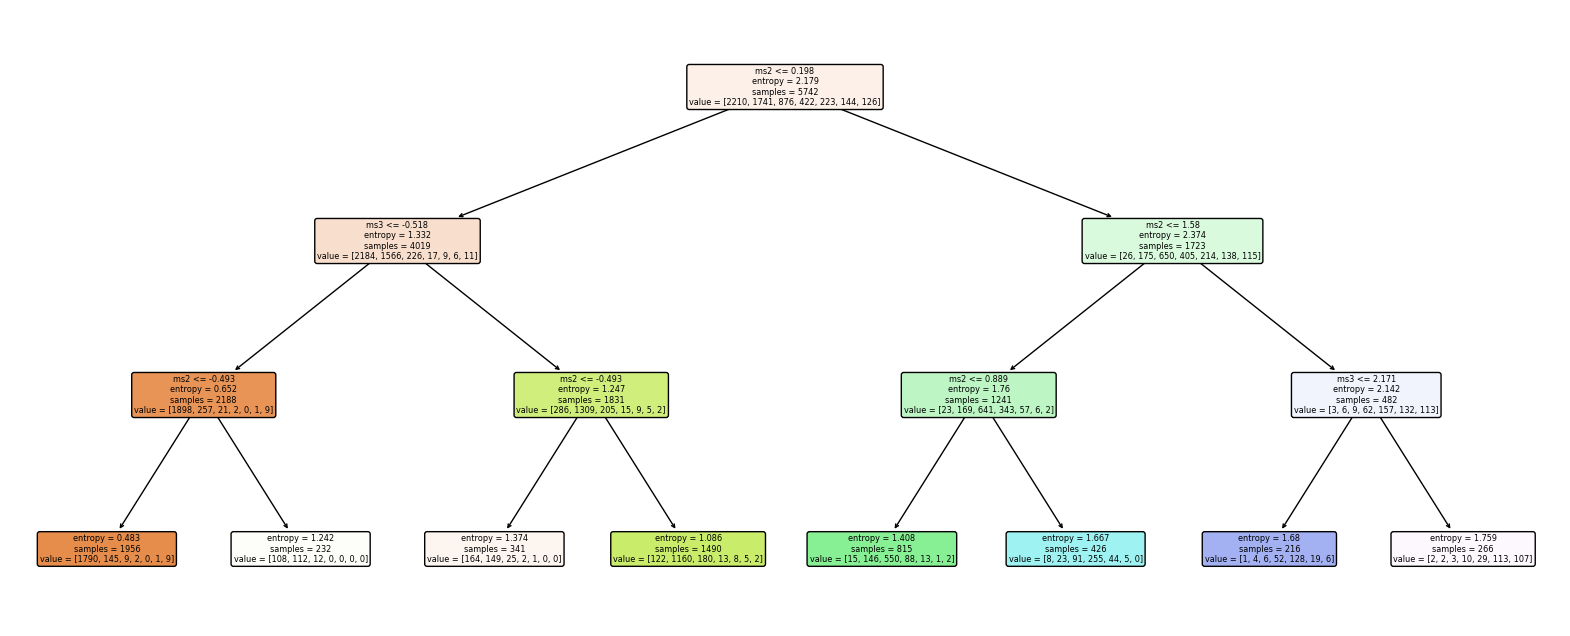

In [ ]:
# Create classifier objects
decision_tree1 = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)

# Train and evaluate the decision tree classifier
decision_tree.fit(X1_train_sc, y1_train)
dt_predictions1 = decision_tree.predict(X1_test_sc)

# Plot the Decision Tree
plt.figure(figsize=(20, 8))
plt.title('Decision Tree MS1')
plot_tree(decision_tree, filled=True, rounded=True, feature_names=X1.columns)
plt.show()

In [ ]:
dt_accuracy1 = accuracy_score(y1_test, dt_predictions1)
dt_precision1 = precision_score(y1_test, dt_predictions1, average='weighted')
dt_recall1 = recall_score(y1_test, dt_predictions1, average='weighted')
dt_f1 = f1_score(y1_test, dt_predictions1, average='weighted')

print("Decision Tree Classifier for MS1:")
print("Accuracy:", dt_accuracy1)
print("Precision:", dt_precision1)
print("Recall:", dt_recall1)
print("F1 Score:", dt_f1)

Decision Tree Classifier for MS1:
Accuracy: 0.7576601671309192
Precision: 0.7427166557147388
Recall: 0.7576601671309192
F1 Score: 0.7480429003011615


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree for MS2

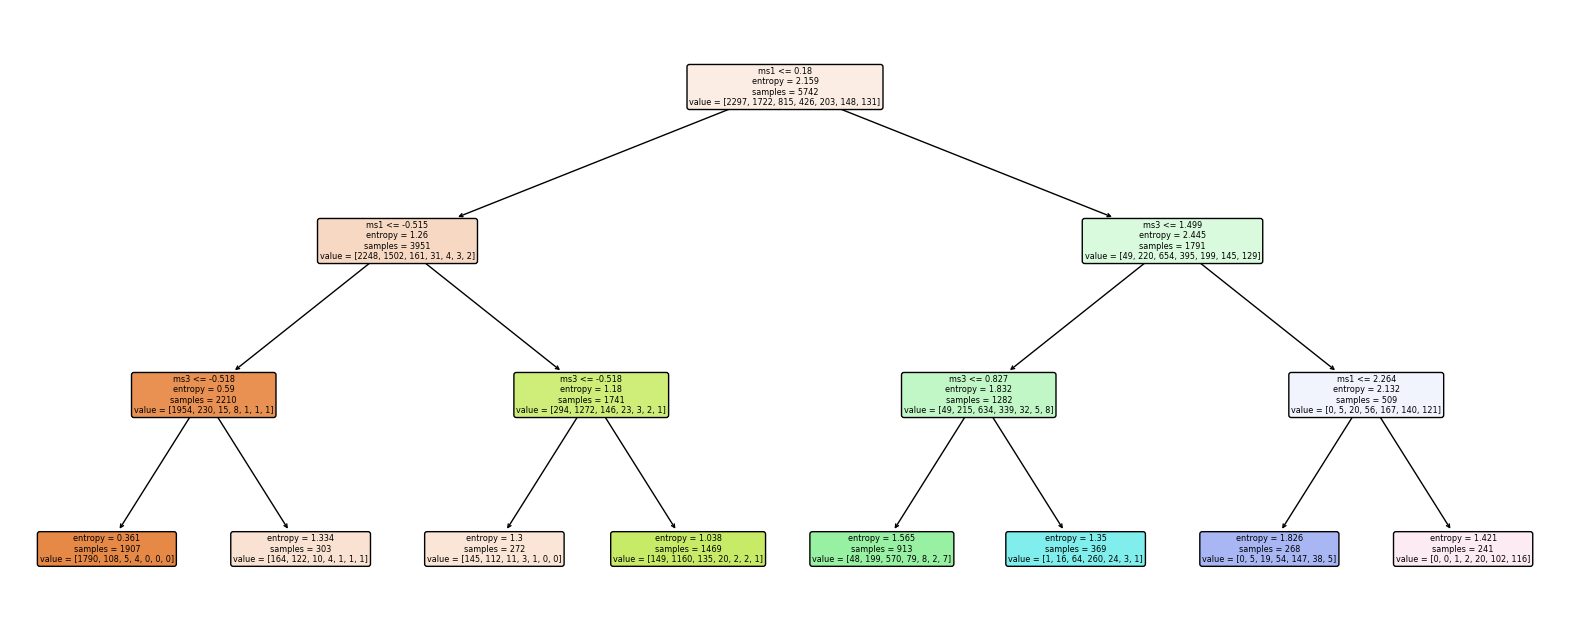

In [ ]:
# Create classifier objects
decision_tree2 = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)

# Train and evaluate the decision tree classifier
decision_tree.fit(X2_train_sc, y2_train)
dt_predictions2 = decision_tree.predict(X2_test_sc)

# Plot the Decision Tree
plt.figure(figsize=(20, 8))
plt.title('Decision Tree MS2')
plot_tree(decision_tree, filled=True, rounded=True, feature_names=X2.columns)
plt.show()

In [ ]:
dt_accuracy2 = accuracy_score(y2_test, dt_predictions2)
dt_precision2 = precision_score(y2_test, dt_predictions2, average='weighted')
dt_recall2 = recall_score(y2_test, dt_predictions2, average='weighted')
dt_f2 = f1_score(y2_test, dt_predictions2, average='weighted')

print("Decision Tree Classifier for MS2:")
print("Accuracy:", dt_accuracy2)
print("Precision:", dt_precision2)
print("Recall:", dt_recall2)
print("F1 Score:", dt_f2)

Decision Tree Classifier for MS2:
Accuracy: 0.766016713091922
Precision: 0.7529153917385503
Recall: 0.766016713091922
F1 Score: 0.7560229611730914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree for MS3

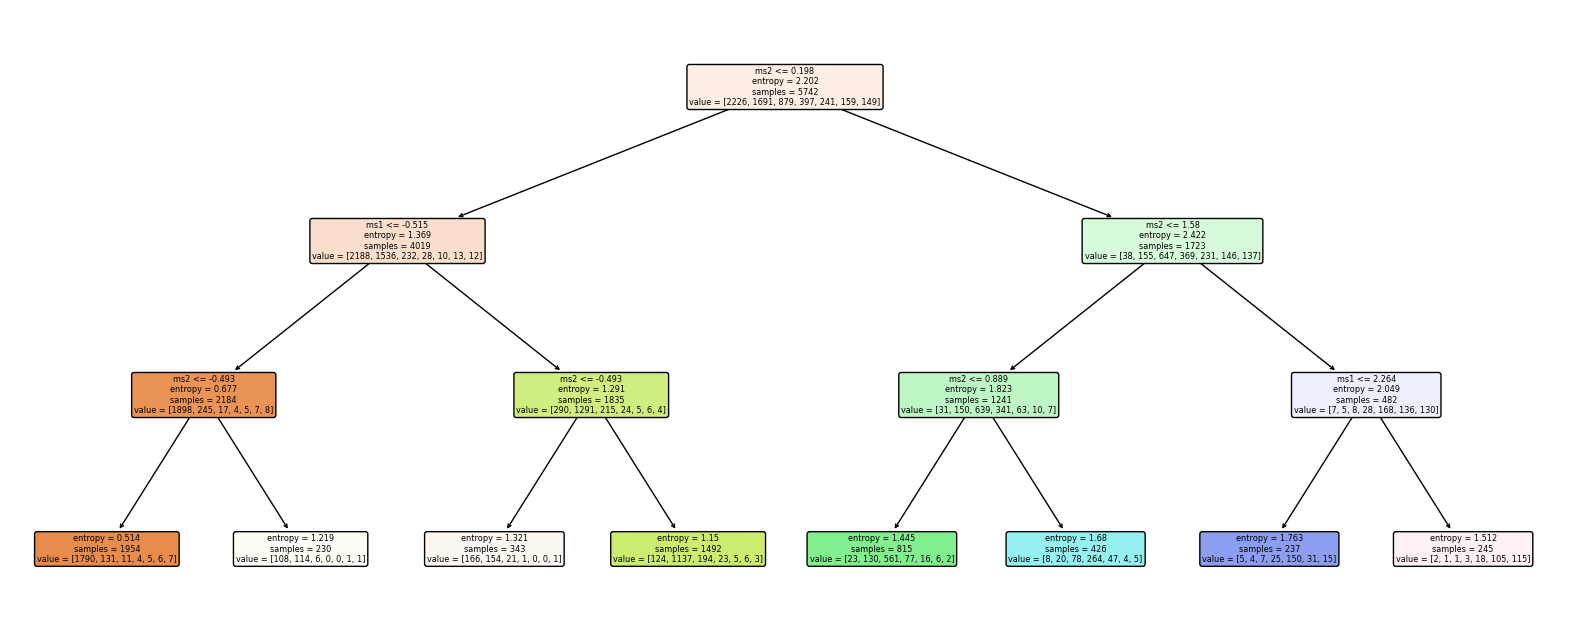

In [ ]:
# Create classifier objects
decision_tree3 = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)

# Train and evaluate the decision tree classifier
decision_tree.fit(X3_train_sc, y3_train)
dt_predictions3 = decision_tree.predict(X3_test_sc)

# Plot the Decision Tree
plt.figure(figsize=(20, 8))
plt.title('Decision Tree MS3')
plot_tree(decision_tree, filled=True, rounded=True, feature_names=X3.columns)
plt.show()

In [ ]:
dt_accuracy3 = accuracy_score(y3_test, dt_predictions3)
dt_precision3 = precision_score(y3_test, dt_predictions3, average='weighted')
dt_recall3 = recall_score(y3_test, dt_predictions3, average='weighted')
dt_f3 = f1_score(y3_test, dt_predictions3, average='weighted')

print("Decision Tree Classifier for MS3:")
print("Accuracy:", dt_accuracy3)
print("Precision:", dt_precision3)
print("Recall:", dt_recall3)
print("F1 Score:", dt_f3)

Decision Tree Classifier for MS3:
Accuracy: 0.7701949860724234
Precision: 0.7505563693621347
Recall: 0.7701949860724234
F1 Score: 0.7578727485834691


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier


Random Forest for MS1

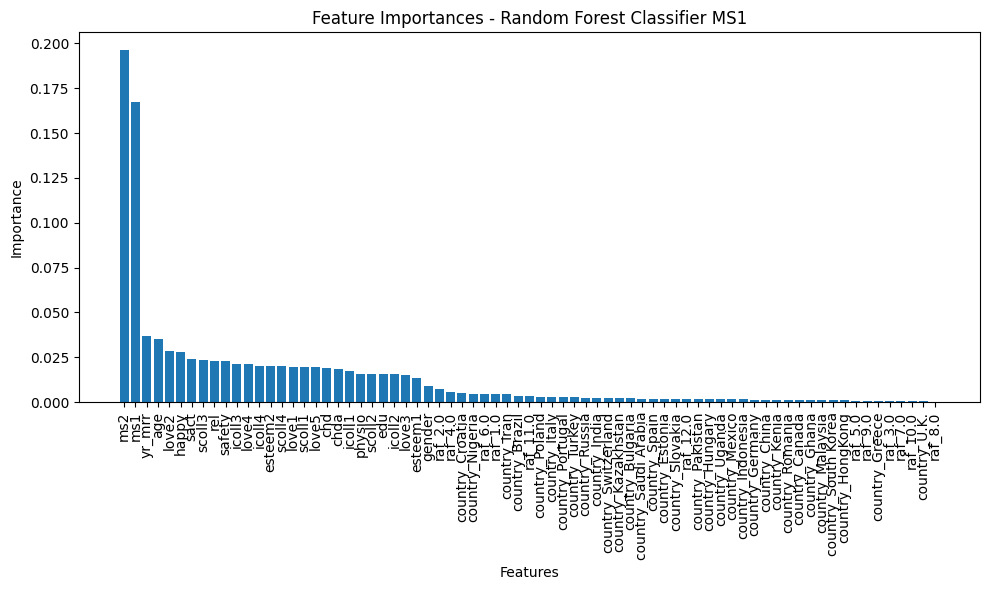

In [ ]:
# Create classifier objects
random_forest = RandomForestClassifier()

# Train and evaluate the random forest classifier
random_forest.fit(X1_train_sc, y1_train)
rf_predictions1 = random_forest.predict(X1_test_sc)

# Get feature importances from the trained Random Forest Classifier
feature_importances = random_forest.feature_importances_

# Get the indices of the features sorted by their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names1 = X1.columns[sorted_indices]

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Classifier MS1')
plt.tight_layout()
plt.show()

In [ ]:
rf_accuracy1 = accuracy_score(y1_test, rf_predictions1)
rf_precision1 = precision_score(y1_test, rf_predictions1, average='weighted')
rf_recall1 = recall_score(y1_test, rf_predictions1, average='weighted')
rf_f1 = f1_score(y1_test, rf_predictions1, average='weighted')

print("Random Forest Classifier for MS1:")
print("Accuracy:", rf_accuracy1)
print("Precision:", rf_precision1)
print("Recall:", rf_recall1)
print("F1 Score:", rf_f1)

Random Forest Classifier for MS1:
Accuracy: 0.7688022284122563
Precision: 0.7667027091613089
Recall: 0.7688022284122563
F1 Score: 0.7651202429234413


Random Forest for MS2

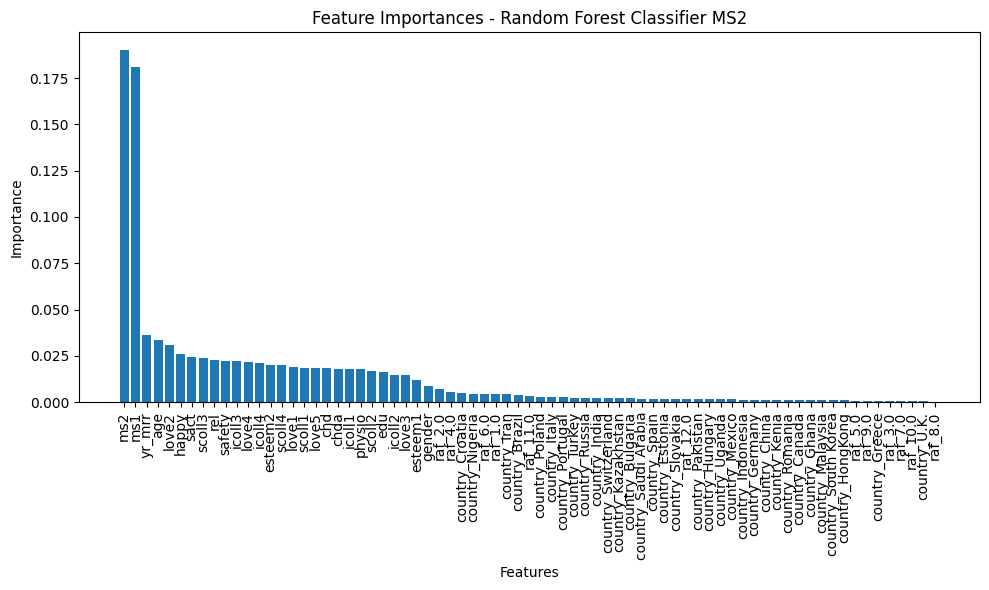

In [ ]:
# Create classifier objects
random_forest = RandomForestClassifier()

# Train and evaluate the random forest classifier
random_forest.fit(X2_train_sc, y2_train)
rf_predictions2 = random_forest.predict(X2_test_sc)

# Get feature importances from the trained Random Forest Classifier
feature_importances = random_forest.feature_importances_

# Get the indices of the features sorted by their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names2 = X2.columns[sorted_indices]

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Classifier MS2')
plt.tight_layout()
plt.show()

In [ ]:
rf_accuracy2 = accuracy_score(y2_test, rf_predictions2)
rf_precision2 = precision_score(y2_test, rf_predictions2, average='weighted')
rf_recall2 = recall_score(y2_test, rf_predictions2, average='weighted')
rf_f2 = f1_score(y2_test, rf_predictions2, average='weighted')

print("Random Forest Classifier for MS2:")
print("Accuracy:", rf_accuracy2)
print("Precision:", rf_precision2)
print("Recall:", rf_recall2)
print("F1 Score:", rf_f2)

Random Forest Classifier for MS2:
Accuracy: 0.791782729805014
Precision: 0.79456679260689
Recall: 0.791782729805014
F1 Score: 0.7899211045641378


Random Forest for MS3

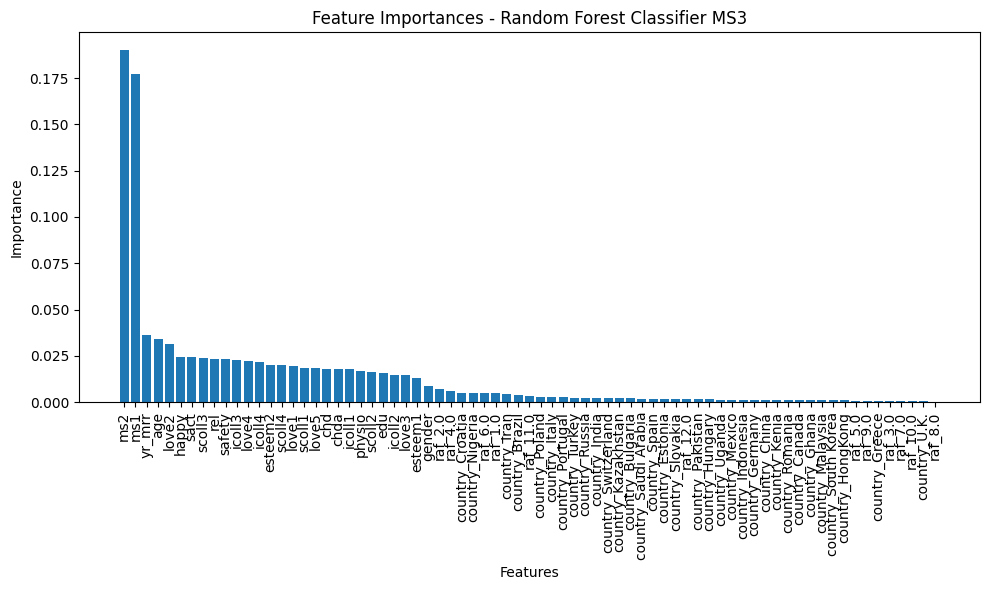

In [ ]:
# Create classifier objects
random_forest = RandomForestClassifier()

# Train and evaluate the random forest classifier
random_forest.fit(X3_train_sc, y3_train)
rf_predictions3 = random_forest.predict(X3_test_sc)

# Get feature importances from the trained Random Forest Classifier
feature_importances = random_forest.feature_importances_

# Get the indices of the features sorted by their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names3 = X3.columns[sorted_indices]

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Classifier MS3')
plt.tight_layout()
plt.show()

In [ ]:
rf_accuracy3 = accuracy_score(y3_test, rf_predictions3)
rf_precision3 = precision_score(y3_test, rf_predictions3, average='weighted')
rf_recall3 = recall_score(y3_test, rf_predictions3, average='weighted')
rf_f3 = f1_score(y3_test, rf_predictions3, average='weighted')

print("Random Forest Classifier for MS3:")
print("Accuracy:", rf_accuracy3)
print("Precision:", rf_precision3)
print("Recall:", rf_recall3)
print("F1 Score:", rf_f3)

Random Forest Classifier for MS3:
Accuracy: 0.770891364902507
Precision: 0.7699147878517807
Recall: 0.770891364902507
F1 Score: 0.7683871400477238


# K-Means Clustering


K-Means Clustering for MS1

In [ ]:
# Initialize the clustering algorithm
km = KMeans(n_clusters=3, random_state=1)

# Fit and predict for ms1
labels_ms1 = km.fit_predict(df[["age", "yr_mrr", "ms1"]])

# Create a copy of df and merge the newly predicted labels for ms1
df_ms1 = df.copy()
df_ms1["ms1"] = labels_ms1

df_ms1["ms1"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    3299
0    2465
1    1414
Name: ms1, dtype: int64

Text(0.5, 1.0, 'Cluster Plot for MS1')

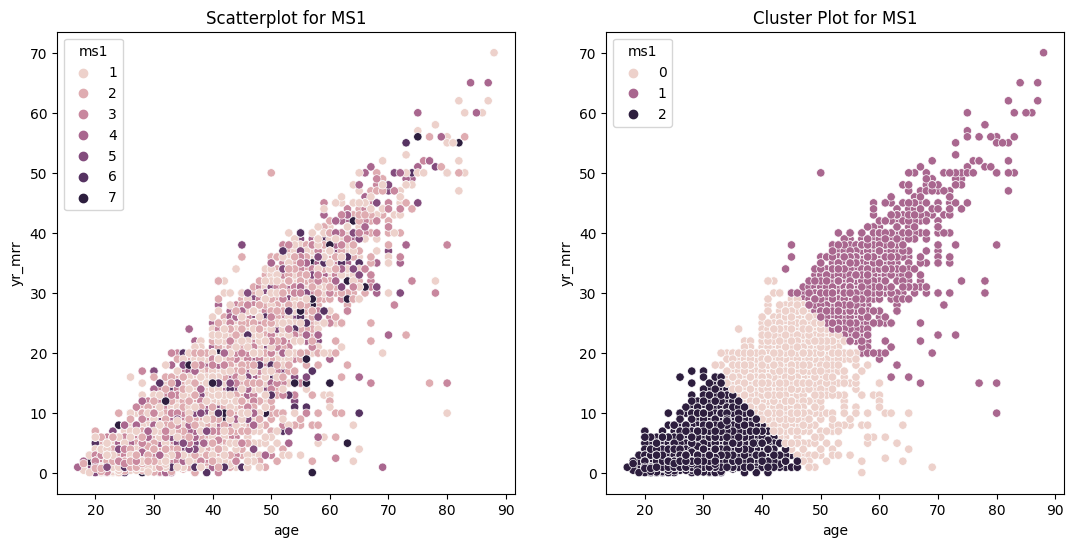

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="age", y="yr_mrr", hue="ms1", data=df, ax=axes[0])
sns.scatterplot(x="age", y="yr_mrr", hue="ms1", data=df_ms1, ax=axes[1])

axes[0].set_title("Scatterplot for MS1")
axes[1].set_title("Cluster Plot for MS1")

K-Means Clustering for MS2

In [ ]:
# Initialize the clustering algorithm
km = KMeans(n_clusters=3, random_state=1)

# Fit and predict for ms2
labels_ms2 = km.fit_predict(df[["age", "yr_mrr", "ms2"]])

# Create a copy of df and merge the newly predicted labels for ms2
df_ms2 = df.copy()
df_ms2["ms2"] = labels_ms2

df_ms2["ms2"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    3322
1    2450
2    1406
Name: ms2, dtype: int64

Text(0.5, 1.0, 'Cluster Plot for MS2')

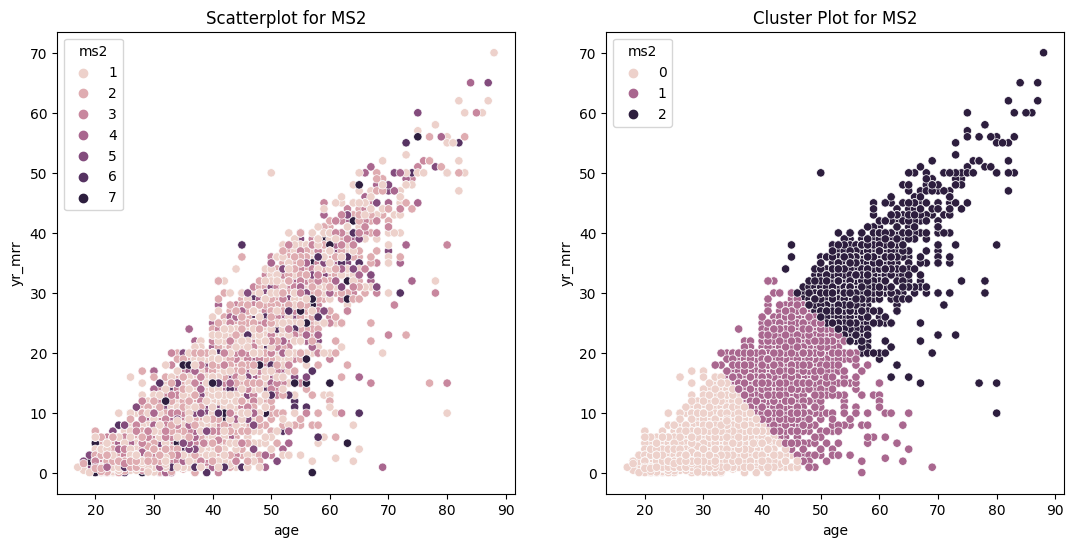

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="age", y="yr_mrr", hue="ms2", data=df, ax=axes[0])
sns.scatterplot(x="age", y="yr_mrr", hue="ms2", data=df_ms2, ax=axes[1])

axes[0].set_title("Scatterplot for MS2")
axes[1].set_title("Cluster Plot for MS2")

K-Means Clustering for MS3

In [ ]:
# Initialize the clustering algorithm
km = KMeans(n_clusters=3, random_state=1)

# Fit and predict for ms3
labels_ms3 = km.fit_predict(df[["age", "yr_mrr", "ms3"]])

# Create a copy of df and merge the newly predicted labels for ms3
df_ms3 = df.copy()
df_ms3["ms3"] = labels_ms3

df_ms3["ms3"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    3299
0    2465
1    1414
Name: ms3, dtype: int64

Text(0.5, 1.0, 'Cluster Plot for MS3')

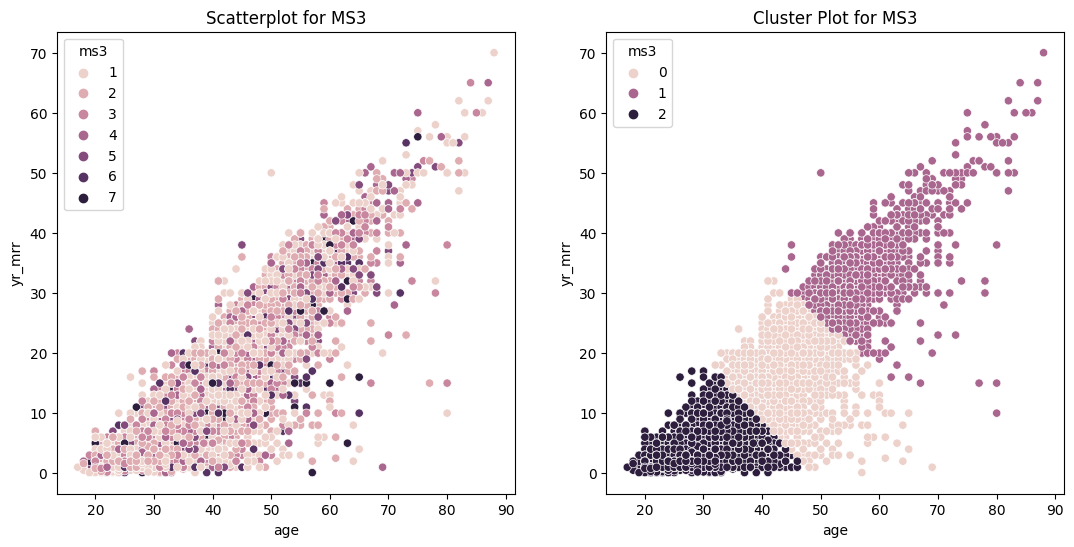

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="age", y="yr_mrr", hue="ms3", data=df, ax=axes[0])
sns.scatterplot(x="age", y="yr_mrr", hue="ms3", data=df_ms3, ax=axes[1])

axes[0].set_title("Scatterplot for MS3")
axes[1].set_title("Cluster Plot for MS3")

# Association Rules Mining Using Apriori Algorithm


Apriori Algorithm for MS1

In [ ]:
# Combine X1 and y1 into a single dataframe
df = pd.concat([X1, y1], axis=1)

# Convert dataframe to transaction format
te = TransactionEncoder()
data_trans = te.fit_transform(df.values.astype(str))
data_trans = pd.DataFrame(data_trans, columns=te.columns_)

# Association rule mining
frequent_itemsets = apriori(data_trans, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print(rules)
rules.head()

               antecedents                consequents  antecedent support  \
0                    (1.0)                      (0.0)            1.000000   
1                    (0.0)                      (1.0)            1.000000   
2                    (0.0)                      (2.0)            1.000000   
3                    (2.0)                      (0.0)            0.989551   
4                    (3.0)                      (0.0)            0.934661   
...                    ...                        ...                 ...   
2284  (7.0, 5.0, 6.0, 4.0)       (1.0, 3.0, 0.0, 2.0)            0.153943   
2285  (7.0, 6.0, 3.0, 4.0)       (1.0, 5.0, 0.0, 2.0)            0.173307   
2286  (7.0, 5.0, 3.0, 6.0)       (1.0, 0.0, 2.0, 4.0)            0.178323   
2287       (7.0, 6.0, 4.0)  (0.0, 1.0, 2.0, 5.0, 3.0)            0.188632   
2288       (7.0, 5.0, 6.0)  (0.0, 1.0, 2.0, 4.0, 3.0)            0.196712   

      consequent support   support  confidence      lift  leverage  convict

antecedents consequents  antecedent support  consequent support   support  \
0       (1.0)       (0.0)            1.000000            1.000000  1.000000   
1       (0.0)       (1.0)            1.000000            1.000000  1.000000   
2       (0.0)       (2.0)            1.000000            0.989551  0.989551   
3       (2.0)       (0.0)            0.989551            1.000000  0.989551   
4       (3.0)       (0.0)            0.934661            1.000000  0.934661   

   confidence  lift  leverage  conviction  
0    1.000000   1.0       0.0         inf  
1    1.000000   1.0       0.0         inf  
2    0.989551   1.0       0.0         1.0  
3    1.000000   1.0       0.0         inf  
4    1.000000   1.0       0.0         inf

Apriori Algorithm for MS2

In [ ]:
# Combine X2 and y2 into a single DataFrame
df = pd.concat([X2, y2], axis=1)

# Convert DataFrame to transaction format
te = TransactionEncoder()
data_trans = te.fit_transform(df.values.astype(str))
data_trans = pd.DataFrame(data_trans, columns=te.columns_)

# Association Rule Mining
frequent_itemsets = apriori(data_trans, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print(rules)
rules.head()

               antecedents                consequents  antecedent support  \
0                    (1.0)                      (0.0)            1.000000   
1                    (0.0)                      (1.0)            1.000000   
2                    (0.0)                      (2.0)            1.000000   
3                    (2.0)                      (0.0)            0.989551   
4                    (3.0)                      (0.0)            0.934661   
...                    ...                        ...                 ...   
2284  (7.0, 5.0, 6.0, 4.0)       (1.0, 3.0, 0.0, 2.0)            0.153943   
2285  (7.0, 6.0, 3.0, 4.0)       (1.0, 5.0, 0.0, 2.0)            0.173307   
2286  (7.0, 5.0, 3.0, 6.0)       (1.0, 0.0, 2.0, 4.0)            0.178323   
2287       (7.0, 6.0, 4.0)  (0.0, 1.0, 2.0, 5.0, 3.0)            0.188632   
2288       (7.0, 5.0, 6.0)  (0.0, 1.0, 2.0, 4.0, 3.0)            0.196712   

      consequent support   support  confidence      lift  leverage  convict

antecedents consequents  antecedent support  consequent support   support  \
0       (1.0)       (0.0)            1.000000            1.000000  1.000000   
1       (0.0)       (1.0)            1.000000            1.000000  1.000000   
2       (0.0)       (2.0)            1.000000            0.989551  0.989551   
3       (2.0)       (0.0)            0.989551            1.000000  0.989551   
4       (3.0)       (0.0)            0.934661            1.000000  0.934661   

   confidence  lift  leverage  conviction  
0    1.000000   1.0       0.0         inf  
1    1.000000   1.0       0.0         inf  
2    0.989551   1.0       0.0         1.0  
3    1.000000   1.0       0.0         inf  
4    1.000000   1.0       0.0         inf

Apriori Algorithm for MS3

In [ ]:
# Combine X3 and y3 into a single DataFrame
df = pd.concat([X3, y3], axis=1)

# Convert DataFrame to transaction format
te = TransactionEncoder()
data_trans = te.fit_transform(df.values.astype(str))
data_trans = pd.DataFrame(data_trans, columns=te.columns_)

# Association Rule Mining
frequent_itemsets = apriori(data_trans, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print(rules)
rules.head()

               antecedents                consequents  antecedent support  \
0                    (1.0)                      (0.0)            1.000000   
1                    (0.0)                      (1.0)            1.000000   
2                    (0.0)                      (2.0)            1.000000   
3                    (2.0)                      (0.0)            0.989551   
4                    (3.0)                      (0.0)            0.934661   
...                    ...                        ...                 ...   
2284  (7.0, 5.0, 6.0, 4.0)       (1.0, 3.0, 0.0, 2.0)            0.153943   
2285  (7.0, 6.0, 3.0, 4.0)       (1.0, 5.0, 0.0, 2.0)            0.173307   
2286  (7.0, 5.0, 3.0, 6.0)       (1.0, 0.0, 2.0, 4.0)            0.178323   
2287       (7.0, 6.0, 4.0)  (0.0, 1.0, 2.0, 5.0, 3.0)            0.188632   
2288       (7.0, 5.0, 6.0)  (0.0, 1.0, 2.0, 4.0, 3.0)            0.196712   

      consequent support   support  confidence      lift  leverage  convict

antecedents consequents  antecedent support  consequent support   support  \
0       (1.0)       (0.0)            1.000000            1.000000  1.000000   
1       (0.0)       (1.0)            1.000000            1.000000  1.000000   
2       (0.0)       (2.0)            1.000000            0.989551  0.989551   
3       (2.0)       (0.0)            0.989551            1.000000  0.989551   
4       (3.0)       (0.0)            0.934661            1.000000  0.934661   

   confidence  lift  leverage  conviction  
0    1.000000   1.0       0.0         inf  
1    1.000000   1.0       0.0         inf  
2    0.989551   1.0       0.0         1.0  
3    1.000000   1.0       0.0         inf  
4    1.000000   1.0       0.0         inf